# Problem Formulation

1 Define the problem  ?

In this assignment, It is a binary classification problem based on the graph data. The task is to predict the anticancer activity of a chemical compound using the chemical structure of the compound. The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1.

2 What is the input ? 

The data is in the form of graph which represents the chemical structure of the compound. Each sample of data contains information about the atoms and the connections between atoms of the molecule. So in this problem the features are the atoms and connections.

3 What is the output?

we are going to predict if The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1.
the probability of a chemical compound to be active for the cancer cell or not. The shape of pred is [batch_size,1]. Thus for each sample, the final output is a number which represents the probability associated with each chemical compound about its activity.

4 What data mining function is required ?

The model is classification model.
  classification is the technique to categorize elements in a collection,basis their predefined functionalities and properties. In classification, the model can classify new instances whose classification is unknown.
These particular instances that are used to create the model are called training data. Such a mechanism of classification uses methods like if-then,decision trees, neural networks, or even a set of classification rules These methods can be retrieved to identify future data.

5 What could be the challenges ?

The challenges that we have is to clean the data froma the noise in the dataset and preprocessing To convert the sdf data to the numeric form so that it can be trained on some model, t
Ans: The input file is structure data file (SDF). It contains information about the chemical composition of a molecule. SDF file store information about position of individual atom in the chemical compound and also tells about the connections. Different molecules are delimited by '$$$$' expression.

Each sample/molecule starts with header which tells about the name/title of the compound. Other sections includes information about Atom count, version number, connections etc. Atom block tells about the elements of the compound. Bond block block tells about the bonding structure of the compound. These both blocks are used in this assignment to get information about the compound and saving them in form of edges and nodes. Each node is the atom given in the chemical molecule

6 What is the impact ?

we are going to predict if The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1.
It is a binary classification problem based on the graph data. The task is to predict the anticancer activity of a chemical compound using the chemical structure of the compound. The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1 

the probability of a chemical compound to be active for the cancer cell or not. The shape of pred is [batch_size,1]. Thus for each sample, the final output is a number which represents the probability associated with each chemical compound about its activity.

7 What is an ideal solution ?

to my rate (aggreation method 2) after making appropriate preprocessing on the dataset to 
help the model to predict the right result after clean the data set and overcome our chalenges

#Imports

In [1]:
#Mounting google drive to import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing libraries
import numpy as np   
from tqdm.notebook import tqdm

In [3]:
def read_sdf(file):
    with open(file, 'r') as rf:   #opening the file in read mode
        content = rf.read()       #reading the contents of the file
    samples = content.split('$$$$') #splitting the read file by delimiter $$$$ thus splitting each molecule in an array
    
    #method to read each molecule configuration
    #s represents one molecule
    def parse_sample(s):
        lines = s.splitlines()    #splitting the text data to lines
        links = []                #empty array for links
        nodes = []                #empty array for nodes
        label = 0
        for l in lines:           #loop over each line
            if l.strip() == '1.0':   #
                label = 1
            if l.strip() == '-1.0':
                label = 0
            if l.startswith('    '):  #for Atom block  
                feature = l.split()   #splitting line
                node = feature[3]     #node feature (atom) as O,C etc.
                nodes.append(node)    #appending nodes
            elif l.startswith(' '):   #bond block tells about connections between atoms
                lnk = l.split()       #splitting line
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):   #
                    links.append((   #appending links
                        int(lnk[0])-1,   #first atom
                        int(lnk[1])-1, # zero-based index #second atom
                        # int(lnk[2]) ignore edge weight
                    ))
        return nodes, np.array(links), label #returning nodes, links and label
    
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  #parse_sample for each molecule

#import data

In [4]:
from sklearn.model_selection import train_test_split

#reading train.sdf file
training_set = read_sdf('/content/drive/MyDrive/train.sdf')

#splitting the train data
training_set, validation_set = train_test_split(training_set, test_size=0.15,)


  0%|          | 0/25024 [00:00<?, ?it/s]

In [5]:
testing_set  = read_sdf('/content/drive/MyDrive/test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

In [6]:
!pip install --quiet networkx
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, 50))

#data Visualizing

In [7]:
#method to visualize the compound graph


def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0] #atoms as nodes
    edges = sample[1] #connections as edges
    
    labeldict={} #empty dictionary for labels for the nodes
    node_color=[] #empty array for each node color
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i)   #adding node to the graph each node as (0,1,2,3..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        #print(i)
        #print(n)
        node_color.append(colors[hash(n)%len(colors)]) #color coding

    # a list of nodes:
    for e in edges: #for each edge
        G.add_edge(e[0], e[1]) #adding egde to the graph from one connection to other connection

    #drawing the graph with labels for nodes as atoms and connections as edges    
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
    #returns graph
    return G

In [51]:
print(training_set[1])

(['Cl', 'O', 'O', 'O', 'N', 'N', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], array([[ 0, 15],
       [ 1, 10],
       [ 1, 14],
       [ 2, 12],
       [ 2, 19],
       [ 3, 18],
       [ 3, 20],
       [ 4,  9],
       [ 4, 10],
       [ 4, 13],
       [ 5, 11],
       [ 5, 13],
       [ 6,  9],
       [ 6, 17],
       [ 7, 15],
       [ 7, 17],
       [ 8, 17],
       [ 9, 11],
       [10, 16],
       [11, 15],
       [12, 14],
       [12, 16],
       [14, 18],
       [19, 21],
       [19, 22],
       [20, 26],
       [20, 27],
       [21, 23],
       [22, 24],
       [23, 25],
       [24, 25],
       [25, 31],
       [26, 29],
       [27, 30],
       [28, 29],
       [28, 30],
       [28, 32]]), 0)


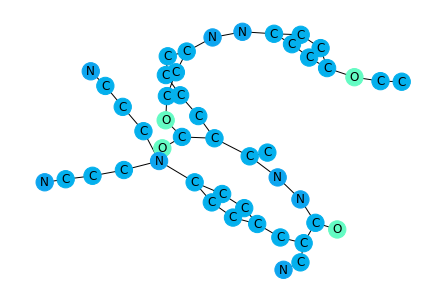

In [8]:
plt.clf()
visualize(training_set[15])

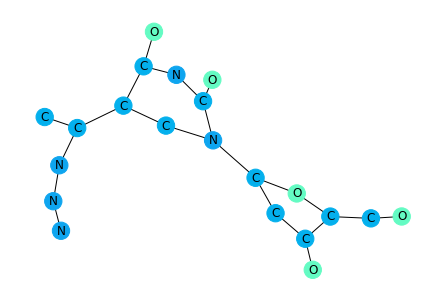

In [9]:
plt.clf()
visualize(training_set[20])

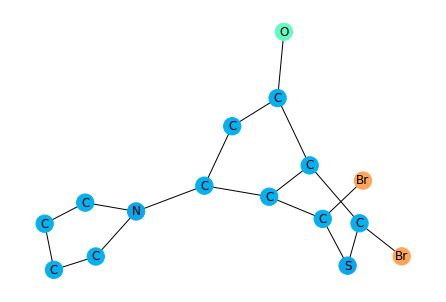

In [10]:
plt.clf()
visualize(training_set[30])

#Data handeling

In [14]:
#checking training set
labelss = []
for sam in training_set:
  labelss.append(sam[2])
np.unique(labelss,return_counts=True)  

(array([0, 1]), array([20232,  1038]))

In [15]:
#checking testing set
labelss = []
for sam in testing_set:
  labelss.append(sam[2])
np.unique(labelss,return_counts=True)

(array([0]), array([12326]))

In [16]:
#Import Tokenizer  
from tensorflow.keras.preprocessing.text import Tokenizer

#vocabulary size
max_vocab = 500
max_len = 100 # maximum length of the tokenized vector


# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]

#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
random.seed(0) #random seed



def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples]                      #nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)   #tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post')  #pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1]                   #maximum length of nodes 
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)] #defining edges
    edges = [e for e in edges if len(e) > 0]

     
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]  #array definition for segmented_ids
    
    all_nodes = np.reshape(sample_nodes, -1)  #reshaping as 1 vector
    all_edges = np.concatenate(edges)         #concatenating all the edges as size [total_edges ,2]

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples]) 


#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:                 #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #randomly shuffling
        l = len(dataset)  #length of dataset
        for ndx in range(0, l, batch_size):  #loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)   #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break

In [18]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=10):
    for k,v in train_batch[0].items():
        print(k)        
        print(v)
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

data
[4 2 2 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 2 3 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 3 3 3 3 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 2 3 3 3 3 3 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 4 2 2 2 2 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 2 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 2 2
 2 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 2 2 2 2 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
Shape is (320,)
edges
[[  0   1]
 [  0   2]
 [  0   5]
 [  0   6]
 [  3  10]
 [  4  10]
 [  5   7]
 [  6   8]
 [  6   9]
 [  7  10]
 [  7  11]
 [  8  13]
 [  9  14]
 [ 11  15]
 [ 11  16]
 [ 12  13]
 [ 12  14]
 [ 12  17]
 [ 32  42]
 [ 33  38]
 [ 34  35]
 [ 34  38]
 [ 34  40]
 [ 35  36]
 [ 36  37]
 [ 36  43]
 [ 37  39]
 [ 37  44]
 [ 38  39]
 [ 4

In [19]:
!pip install --quiet tf2_gnn
from tf2_gnn.layers.gnn import GNN, GNNInput


     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 346 kB 47.1 MB/s 
     |████████████████████████████████| 1.2 MB 40.2 MB/s 
     |████████████████████████████████| 134 kB 50.5 MB/s 
     |████████████████████████████████| 462 kB 45.0 MB/s 
     |████████████████████████████████| 3.6 MB 42.8 MB/s 
     |████████████████████████████████| 178 kB 53.3 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 85 kB 4.0 MB/s 
     |████████████████████████████████| 41 kB 596 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


#Aggregation 1


In [20]:
import tensorflow as tf
from tensorflow.math import segment_mean #to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model #layers and model
from tensorflow.keras.layers import Embedding, Dense #layers
from tensorflow.keras.optimizers import Adam #optimizer

In [21]:
data = keras.Input(batch_shape=(None,))  #Input layer for nodes (tokenized text data)            eg. [440]

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #Input layer for edge data         eg. [257,2]
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids    eg. [440]

embeded = Embedding(tokenizer.num_words, 100)(data)  #embedding layer over data with each token embedded as  size vector eg. [440,50]


# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1  #calculating number of samples (or min(batch_size,no._of_samples))    eg. 10

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)


In [22]:
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 40  #defining hidden dimension of the gnn layer

#gnn layer with defined hyperparameters
gnn_layer = GNN(params)  

#gnn output layer 
gnn_out = gnn_layer(gnn_input) #outpur shape: [data_dimension,hidden layers]   eg. [440,64]

print('gnn_out', gnn_out)           


#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )                                    #shape: [batch_size,64]  eg. [10,64]

print('mean:', avg)

#final dense layer with sigmoid
pred = Dense(1, activation='sigmoid')(avg)   #output shape: [batch_size,1] eg. []
print('pred:', pred)


gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")


In [23]:
model = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max (TFOpLambda  ()                  0           ['input_3[0][0]']                
 )                                                                                                
                                                                                                  
 embedding (Embedding)          (None, 100)          50000       ['input_1[0][0]']            

In [24]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

##trail 1

In [ ]:
import math

batch_size = 8
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data
model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=20,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 40), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a larg

2659/2659 [==============================] - 41s 13ms/step - loss: 0.2188 - auc: 0.5376 - val_loss: 0.2135 - val_auc: 0.5440
Epoch 2/20
2659/2659 [==============================] - 30s 11ms/step - loss: 0.2070 - auc: 0.5901 - val_loss: 0.1966 - val_auc: 0.6323
Epoch 3/20
2659/2659 [==============================] - 36s 13ms/step - loss: 0.2046 - auc: 0.5859 - val_loss: 0.1972 - val_auc: 0.5997
Epoch 4/20
2659/2659 [==============================] - 33s 12ms/step - loss: 0.2029 - auc: 0.5955 - val_loss: 0.2221 - val_auc: 0.4675
Epoch 5/20
2659/2659 [==============================] - 36s 14ms/step - loss: 0.2064 - auc: 0.5575 - val_loss: 0.2056 - val_auc: 0.4865
Epoch 6/20
2659/2659 [==============================] - 29s 11ms/step - loss: 0.2011 - auc: 0.5737 - val_loss: 0.2106 - val_auc: 0.5269
Epoch 7/20
2659/2659 [==============================] - 29s 11ms/step - loss: 0.1991 - auc: 0.5717 - val_loss: 0.1954 - val_auc: 0.6346
Epoch 8/20
2659/2659 [==============================] - 30s

In [ ]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [ ]:
len(y_pred)


12326

In [ ]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('st1.csv')

##trail 2

In [ ]:
import math

batch_size = 128
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data
model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=10, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/30
167/167 [==============================] - 36s 217ms/step - loss: 0.1840 - auc: 0.6628 - val_loss: 0.2100 - val_auc: 0.5954
Epoch 2/30
167/167 [==============================] - 23s 138ms/step - loss: 0.1787 - auc: 0.6940 - val_loss: 0.2395 - val_auc: 0.6752
Epoch 3/30
167/167 [==============================] - 22s 134ms/step - loss: 0.1767 - auc: 0.7063 - val_loss: 0.2160 - val_auc: 0.5876
Epoch 4/30
167/167 [==============================] - 24s 141ms/step - loss: 0.1765 - auc: 0.7079 - val_loss: 0.1756 - val_auc: 0.6811
Epoch 5/30
167/167 [==============================] - 24s 142ms/step - loss: 0.1758 - auc: 0.7163 - val_loss: 0.1783 - val_auc: 0.7964
Epoch 6/30
167/167 [==============================] - 23s 136ms/step - loss: 0.1754 - auc: 0.7141 - val_loss: 0.2032 - val_auc: 0.6918
Epoch 7/30
167/167 [==============================] - 22s 135ms/step - loss: 0.1743 - auc: 0.7236 - val_loss: 0.1636 - val_auc: 0.8085
Epoch 8/30
167/167 [==============================] - 2

In [ ]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [ ]:
len(y_pred)


12326

In [ ]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('st2.csv')

##trail 3


In [ ]:
import math

batch_size = 8
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data
model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=8,
    validation_data=gen_batch(
        validation_set, batch_size=10, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/8
2659/2659 [==============================] - 40s 15ms/step - loss: 0.1822 - auc: 0.6812 - val_loss: 0.1838 - val_auc: 0.6834
Epoch 2/8
2659/2659 [==============================] - 32s 12ms/step - loss: 0.1844 - auc: 0.6724 - val_loss: 0.1814 - val_auc: 0.6261
Epoch 3/8
2659/2659 [==============================] - 33s 12ms/step - loss: 0.1872 - auc: 0.6585 - val_loss: 0.1799 - val_auc: 0.6710
Epoch 4/8
2659/2659 [==============================] - 33s 13ms/step - loss: 0.1840 - auc: 0.6724 - val_loss: 0.1879 - val_auc: 0.6631
Epoch 5/8
2659/2659 [==============================] - 33s 13ms/step - loss: 0.1855 - auc: 0.6706 - val_loss: 0.1927 - val_auc: 0.6680
Epoch 6/8
2659/2659 [==============================] - 33s 13ms/step - loss: 0.1864 - auc: 0.6471 - val_loss: 0.1783 - val_auc: 0.6936
Epoch 7/8
2659/2659 [==============================] - 31s 12ms/step - loss: 0.1871 - auc: 0.6524 - val_loss: 0.1828 - val_auc: 0.6754
Epoch 8/8
2659/2659 [==============================] - 

In [ ]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [ ]:
len(y_pred)


12326

In [ ]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('st3.csv')

In [ ]:
import math

batch_size = 8
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data
model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=8,
    validation_data=gen_batch(
        validation_set, batch_size=10, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/8
2659/2659 [==============================] - 35s 13ms/step - loss: 0.1847 - auc: 0.6777 - val_loss: 0.1822 - val_auc: 0.6795
Epoch 2/8
2659/2659 [==============================] - 32s 12ms/step - loss: 0.1837 - auc: 0.6752 - val_loss: 0.1961 - val_auc: 0.6756
Epoch 3/8
2659/2659 [==============================] - 32s 12ms/step - loss: 0.1865 - auc: 0.6616 - val_loss: 0.1857 - val_auc: 0.6827
Epoch 4/8
2659/2659 [==============================] - 31s 12ms/step - loss: 0.1847 - auc: 0.6620 - val_loss: 0.1743 - val_auc: 0.7188
Epoch 5/8
2659/2659 [==============================] - 33s 12ms/step - loss: 0.1859 - auc: 0.6593 - val_loss: 0.1922 - val_auc: 0.6339
Epoch 6/8
2659/2659 [==============================] - 33s 12ms/step - loss: 0.1853 - auc: 0.6598 - val_loss: 0.1826 - val_auc: 0.6263
Epoch 7/8
2659/2659 [==============================] - 33s 12ms/step - loss: 0.1851 - auc: 0.6688 - val_loss: 0.1842 - val_auc: 0.7248
Epoch 8/8
2659/2659 [==============================] - 

In [ ]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [ ]:
len(y_pred)


12326

In [ ]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('st3.csv')

##trail 4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_vocab = 500
max_len = 100


# build vocabulary from training set
all_nodes = [s[0] for s in training_set]
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
random.seed(0)

def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples]
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)
    sample_nodes = pad_sequences(sample_nodes, padding='post')
    max_nodes_len = np.shape(sample_nodes)[1]                           #shape: (num of samples, number of nodes)
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]        #s[1]: links, i*max_nodes_len: to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0]                          #make sure all elements are non-zero
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]
    
    all_nodes = np.reshape(sample_nodes, -1)      #concatenate nodes of all samples together
    all_edges = np.concatenate(edges)             #concatenate edges of all samples together (because edge is tuple, doesnt hae reshape, output is 2D)

    node_to_graph = np.reshape(node_to_graph, -1)
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples])



def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:
        dataset = list(dataset)
        if shuffle:
            random.shuffle(dataset)
        l = len(dataset)
        for ndx in range(0, l, batch_size):
            batch_samples = dataset[ndx:min(ndx + batch_size, l)]
            yield prepare_single_batch(batch_samples)
        if not repeat:
            break


In [ ]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():          #k: labels, v: values
        print(k)
        print(v)
        #print(len(v))
        pass
    print('label', train_batch[1])
    break



data
[2 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 2
 2 2 2 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 8 6 6 6 6
 6 6 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 5 2 2 3 3 3 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
edges
[[  0   6]
 [  1   7]
 [  2  13]
 [  2  20]
 [  3  13]
 [  4   5]
 [  4   6]
 [  4  10]
 [  5   7]
 [  5  11]
 [  6   8]
 [  7   9]
 [  8   9]
 [  8  15]
 [  9  16]
 [ 10  12]
 [ 10  13]
 [ 11  14]
 [ 11  19]
 [ 12  14]
 [ 15  17]
 [ 16  18]
 [ 17  18]
 [ 34  35]
 [ 34  46]
 [ 35  47]
 [ 36  62]
 [ 36  66]
 [ 37  59]
 [ 38  59]
 [ 39  65]
 [ 40  65]
 [ 41  67]
 [ 42  67]
 [ 43  45]
 [ 43  48]
 [ 43  53]
 [ 44  49]
 [ 44  50]
 [ 44  54]
 [ 45  49]
 [ 45  51]
 [ 46  48]
 [ 46  55]
 [ 46  56]
 [ 47  50]
 [ 47  60]
 [ 47  61]
 [ 51  52]
 [ 52  57]
 [ 52  58]
 [ 53  59]
 [ 54  65]
 [ 57  63]
 [ 58  64]
 [ 62  63]
 [ 62  64]
 [ 66  67]
 [ 68  91]
 [ 69  77]
 [ 69  84]
 [ 69  85]
 [ 69  86]
 [ 70  82]
 [ 71  8

In [ ]:
!pip install --quiet tf2_gnn

# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py

from tf2_gnn.layers.gnn import GNN, GNNInput

In [ ]:
import tensorflow as tf
from tensorflow.math import segment_mean
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.optimizers import Adam

data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #edge is 2D
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32
#params['message_calculation_class']
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []        

In [ ]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [ ]:
import math

batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_3_grad/Identity_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/cond_3_grad/Identity:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/cond_3_grad/Identity_2:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/rgcn_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/rgcn_2/embedding_lookup_grad/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/rgcn_2/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor

1330/1330 [==============================] - 47s 33ms/step - loss: 0.2247 - auc: 0.5057 - val_loss: 0.1925 - val_auc: 0.6601
Epoch 2/5
1330/1330 [==============================] - 24s 18ms/step - loss: 0.1930 - auc: 0.6290 - val_loss: 0.1879 - val_auc: 0.6606
Epoch 3/5
1330/1330 [==============================] - 24s 18ms/step - loss: 0.1887 - auc: 0.6556 - val_loss: 0.1896 - val_auc: 0.6423
Epoch 4/5
1330/1330 [==============================] - 23s 18ms/step - loss: 0.1891 - auc: 0.6620 - val_loss: 0.1828 - val_auc: 0.6899
Epoch 5/5
1330/1330 [==============================] - 25s 18ms/step - loss: 0.1861 - auc: 0.6790 - val_loss: 0.2127 - val_auc: 0.6536


In [ ]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)

y_pred = np.reshape(y_pred, -1)
y_pred.shape

(12326,)

In [ ]:
y_pred

array([0.01470688, 0.01020283, 0.00934735, ..., 0.00323755, 0.0423916 ,
       0.00588229], dtype=float32)

In [ ]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('sample_submission.csv')

##trail 5

In [ ]:
import math

batch_size = 64
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
333/333 [==============================] - 24s 71ms/step - loss: 0.1825 - auc: 0.6840 - val_loss: 0.1629 - val_auc: 0.7088
Epoch 2/10
333/333 [==============================] - 21s 63ms/step - loss: 0.1810 - auc: 0.6910 - val_loss: 0.1970 - val_auc: 0.7394
Epoch 3/10
333/333 [==============================] - 23s 69ms/step - loss: 0.1786 - auc: 0.7076 - val_loss: 0.2069 - val_auc: 0.7069
Epoch 4/10
333/333 [==============================] - 21s 63ms/step - loss: 0.1786 - auc: 0.7068 - val_loss: 0.1612 - val_auc: 0.7384
Epoch 5/10
333/333 [==============================] - 25s 75ms/step - loss: 0.1788 - auc: 0.7069 - val_loss: 0.1728 - val_auc: 0.6655
Epoch 6/10
333/333 [==============================] - 23s 69ms/step - loss: 0.1781 - auc: 0.7117 - val_loss: 0.1884 - val_auc: 0.7675
Epoch 7/10
333/333 [==============================] - 22s 65ms/step - loss: 0.1758 - auc: 0.7213 - val_loss: 0.2082 - val_auc: 0.6693
Epoch 8/10
333/333 [==============================] - 23s 70ms

In [ ]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)

y_pred = np.reshape(y_pred, -1)
y_pred.shape

(12326,)

In [ ]:
y_pred

array([0.39257607, 0.14778882, 0.11104897, ..., 0.02729055, 0.25621212,
       0.04084799], dtype=float32)

In [ ]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('tr.csv')

#Aggregation 2


In [25]:
from  tf2_gnn.layers.message_passing import rgat,rgin,rgcn,gnn_film,ggnn,gnn_edge_mlp
import tensorflow as tf
from tensorflow.math import segment_mean #to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model #layers and model
from tensorflow.keras.layers import Embedding, Dense #layers
from tensorflow.keras.optimizers import Adam #optimizer

In [26]:
data = keras.Input(batch_shape=(None,))  #Input layer for nodes (tokenized text data)            eg. [440]

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #Input layer for edge data         eg. [257,2]
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids    eg. [440]

embeded = Embedding(tokenizer.num_words, 75)(data)  #embedding layer over data with each token embedded as  size vector eg. [440,75]


# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1  #calculating number of samples (or min(batch_size,no._of_samples))    eg. 10

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 #defining hidden dimension of the gnn layer
params["message_calculation_class"] = 'GGNN'
#params["num_edge_MLP_hidden_layers"] = 16
#gnn layer with defined hyperparameters
gnn_layer = GNN(params)  

#gnn output layer 
gnn_out = gnn_layer(gnn_input) #outpur shape: [data_dimension,hidden layers]   eg. [440,32]

print('gnn_out', gnn_out)           

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )                                    #shape: [batch_size,64]  eg. [10,32]

print('mean:', avg)

#final dense layer with sigmoid
fc1 = Dense(8,activation='relu')(avg) #Output [None,8]
#fc2 = Dense(64,activation='relu')(fc1)
pred = Dense(1, activation='sigmoid')(fc1)   #output shape: [batch_size,1] 
print('pred:', pred)

#building model 
#inputs are data,edges and node2graph
#input: dictionary
#output: prediction value from dense layer
model = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []        

In [27]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

##trail 6

In [ ]:
import math

batch_size = 64

#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data

num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=2,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
   # callbacks=[
    #    tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')]
)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_3/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_3/embedding_lookup_grad/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/ggnn_3/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_2/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_2/embedding_lookup_grad/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/ggnn_2/embedding_lookup_grad/Cast:0", s

333/333 [==============================] - 42s 108ms/step - loss: 0.2021 - auc: 0.5967 - val_loss: 0.1852 - val_auc: 0.6378
Epoch 2/2
333/333 [==============================] - 35s 106ms/step - loss: 0.1870 - auc: 0.6432 - val_loss: 0.1763 - val_auc: 0.7003


In [ ]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [ ]:
len(y_pred)


12326

In [ ]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('st6.csv')

##trail 7

In [ ]:
import math

batch_size = 16

#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data

num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=5,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
   # callbacks=[
    #    tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')]
)

Epoch 1/5
1330/1330 [==============================] - 36s 27ms/step - loss: 0.1851 - auc: 0.6508 - val_loss: 0.1821 - val_auc: 0.6779
Epoch 2/5
1330/1330 [==============================] - 35s 26ms/step - loss: 0.1790 - auc: 0.6998 - val_loss: 0.1848 - val_auc: 0.6896
Epoch 3/5
1330/1330 [==============================] - 35s 26ms/step - loss: 0.1778 - auc: 0.7032 - val_loss: 0.1854 - val_auc: 0.6792
Epoch 4/5
1330/1330 [==============================] - 36s 27ms/step - loss: 0.1748 - auc: 0.7215 - val_loss: 0.1775 - val_auc: 0.7011
Epoch 5/5
1330/1330 [==============================] - 36s 27ms/step - loss: 0.1745 - auc: 0.7266 - val_loss: 0.1805 - val_auc: 0.6870


In [ ]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [ ]:
len(y_pred)


12326

In [ ]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('st7.csv')

##trail 8

In [ ]:
import math

batch_size = 64

#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data

num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=18,
    validation_data=gen_batch(
        validation_set, batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
   # callbacks=[
    #    tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')]
)

Epoch 1/18
333/333 [==============================] - 37s 110ms/step - loss: 0.1704 - auc: 0.7405 - val_loss: 0.1719 - val_auc: 0.7281
Epoch 2/18
333/333 [==============================] - 36s 109ms/step - loss: 0.1686 - auc: 0.7584 - val_loss: 0.1760 - val_auc: 0.7210
Epoch 3/18
333/333 [==============================] - 36s 107ms/step - loss: 0.1660 - auc: 0.7707 - val_loss: 0.1669 - val_auc: 0.7316
Epoch 4/18
333/333 [==============================] - 38s 116ms/step - loss: 0.1657 - auc: 0.7734 - val_loss: 0.1761 - val_auc: 0.7410
Epoch 5/18
333/333 [==============================] - 35s 105ms/step - loss: 0.1652 - auc: 0.7735 - val_loss: 0.1662 - val_auc: 0.7408
Epoch 6/18
333/333 [==============================] - 37s 110ms/step - loss: 0.1626 - auc: 0.7836 - val_loss: 0.1605 - val_auc: 0.7625
Epoch 7/18
333/333 [==============================] - 37s 111ms/step - loss: 0.1611 - auc: 0.7886 - val_loss: 0.1672 - val_auc: 0.7522
Epoch 8/18
333/333 [==============================] - 3

In [ ]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [ ]:
len(y_pred)


12326

In [ ]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('st8.csv')

##trail 9

In [28]:
import math

batch_size = 32

#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data

num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=20,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
   # callbacks=[
    #    tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5, restore_best_weights=True,mode='max')]
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/ggnn_3/embedding_lookup_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/ggnn_3/embedding_lookup_grad/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradients/ggnn_3/embedding_lookup_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tenso

665/665 [==============================] - 36s 47ms/step - loss: 0.1977 - auc: 0.6030 - val_loss: 0.1850 - val_auc: 0.6584
Epoch 2/20
665/665 [==============================] - 31s 47ms/step - loss: 0.1869 - auc: 0.6457 - val_loss: 0.1916 - val_auc: 0.6994
Epoch 3/20
665/665 [==============================] - 31s 47ms/step - loss: 0.1868 - auc: 0.6504 - val_loss: 0.2020 - val_auc: 0.5915
Epoch 4/20
665/665 [==============================] - 43s 65ms/step - loss: 0.1850 - auc: 0.6579 - val_loss: 0.1852 - val_auc: 0.7039
Epoch 5/20
665/665 [==============================] - 31s 47ms/step - loss: 0.1825 - auc: 0.6741 - val_loss: 0.1893 - val_auc: 0.6808
Epoch 6/20
665/665 [==============================] - 31s 47ms/step - loss: 0.1798 - auc: 0.6935 - val_loss: 0.1509 - val_auc: 0.7233
Epoch 7/20
665/665 [==============================] - 32s 47ms/step - loss: 0.1777 - auc: 0.7028 - val_loss: 0.1990 - val_auc: 0.6689
Epoch 8/20
665/665 [==============================] - 31s 46ms/step - los

In [29]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [30]:
len(y_pred)


12326

In [31]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('st9.csv')

#Aggregation 3


In [32]:
from  tf2_gnn.layers.message_passing import RGAT,  MessagePassing, MessagePassingInput
import tensorflow as tf
from tensorflow.math import segment_mean #to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model #layers and model
from tensorflow.keras.layers import Embedding, Dense #layers
from tensorflow.keras.optimizers import Adam #optimizer


In [33]:

data = keras.Input(batch_shape=(None,))  #Input layer for nodes (tokenized text data)            eg. [440]

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #Input layer for edge data         eg. [257,2]
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32) #Input layer for node2graph ids    eg. [440]

embeded = Embedding(tokenizer.num_words, 100)(data)  #embedding layer over data with each token embedded as  size vector eg. [440,100]


# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1  #calculating number of samples (or min(batch_size,no._of_samples))    eg. 10

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 12 #defining hidden dimension of the gnn layer
params["message_calculation_class"] = 'rgat'
#params["num_layers"] = 4
params["num_heads"] = 3

#params['num_aggr_MLP_hidden_layers'] = 12
#gnn layer with defined hyperparameters
gnn_layer = GNN(params)  

#gnn output layer 
gnn_out = gnn_layer(gnn_input) #outpur shape: [data_dimension,hidden layers]   eg. [440,12]

print('gnn_out', gnn_out)           

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )                                    #shape: [batch_size,64]  eg. [10,12]

print('mean:', avg)

#final dense layer with sigmoid
pred = Dense(1, activation='sigmoid')(avg)   #output shape: [batch_size,1] 
print('pred:', pred)

#building model 
#inputs are data,edges and node2graph
#input: dictionary
#output: prediction value from dense layer
model = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

#printing summary of the model
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 12), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 12), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None,)]            0           []        

In [34]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

##trail 10

In [35]:
import math

batch_size = 16

#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data

num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_1_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_1_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_1_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradients/GatherV2_grad/Reshape:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/GatherV2_grad/Cast:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amo

1330/1330 [==============================] - 28s 17ms/step - loss: 0.2483 - auc: 0.4123 - val_loss: 0.2074 - val_auc: 0.5828
Epoch 2/30
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1990 - auc: 0.5650 - val_loss: 0.1896 - val_auc: 0.6211
Epoch 3/30
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1950 - auc: 0.6108 - val_loss: 0.1924 - val_auc: 0.6586
Epoch 4/30
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1915 - auc: 0.6358 - val_loss: 0.1840 - val_auc: 0.6863
Epoch 5/30
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1901 - auc: 0.6466 - val_loss: 0.1799 - val_auc: 0.6919
Epoch 6/30
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1871 - auc: 0.6609 - val_loss: 0.1857 - val_auc: 0.6997
Epoch 7/30
1330/1330 [==============================] - 21s 15ms/step - loss: 0.1878 - auc: 0.6545 - val_loss: 0.1792 - val_auc: 0.6969
Epoch 8/30
1330/1330 [==============================] - 21s

In [36]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [37]:
len(y_pred)


12326

In [38]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('ts10.csv')

##trail 11

In [39]:
import math

batch_size = 16

#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data

num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=20,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/20
1330/1330 [==============================] - 20s 15ms/step - loss: 0.1788 - auc: 0.6879 - val_loss: 0.1784 - val_auc: 0.6790
Epoch 2/20
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1768 - auc: 0.6961 - val_loss: 0.1784 - val_auc: 0.7095
Epoch 3/20
1330/1330 [==============================] - 22s 16ms/step - loss: 0.1781 - auc: 0.6810 - val_loss: 0.1731 - val_auc: 0.6943
Epoch 4/20
1330/1330 [==============================] - 23s 17ms/step - loss: 0.1770 - auc: 0.6910 - val_loss: 0.1775 - val_auc: 0.6830
Epoch 5/20
1330/1330 [==============================] - 22s 17ms/step - loss: 0.1790 - auc: 0.6793 - val_loss: 0.1649 - val_auc: 0.7450
Epoch 6/20
1330/1330 [==============================] - 22s 16ms/step - loss: 0.1772 - auc: 0.6849 - val_loss: 0.1750 - val_auc: 0.7047
Epoch 7/20
1330/1330 [==============================] - 22s 16ms/step - loss: 0.1767 - auc: 0.6973 - val_loss: 0.1737 - val_auc: 0.6939
Epoch 8/20
1330/1330 [==========================

In [40]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [41]:
len(y_pred)


12326

In [42]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('ts11.csv')

##trail 12

In [43]:
import math

batch_size = 16

#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data

num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1751 - auc: 0.6899 - val_loss: 0.1755 - val_auc: 0.6948
Epoch 2/10
1330/1330 [==============================] - 21s 16ms/step - loss: 0.1767 - auc: 0.6891 - val_loss: 0.1723 - val_auc: 0.6919
Epoch 3/10
1330/1330 [==============================] - 22s 17ms/step - loss: 0.1773 - auc: 0.6948 - val_loss: 0.1730 - val_auc: 0.6827
Epoch 4/10
1330/1330 [==============================] - 22s 16ms/step - loss: 0.1755 - auc: 0.6993 - val_loss: 0.1690 - val_auc: 0.7013
Epoch 5/10
1330/1330 [==============================] - 23s 17ms/step - loss: 0.1763 - auc: 0.6919 - val_loss: 0.1747 - val_auc: 0.7016
Epoch 6/10
1330/1330 [==============================] - 22s 16ms/step - loss: 0.1761 - auc: 0.6969 - val_loss: 0.1763 - val_auc: 0.6672
Epoch 7/10
1330/1330 [==============================] - 22s 16ms/step - loss: 0.1778 - auc: 0.6953 - val_loss: 0.1745 - val_auc: 0.6652
Epoch 8/10
1330/1330 [==========================

In [44]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [45]:
len(y_pred)


12326

In [46]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('ts12.csv')

##trail 13

In [47]:
import math

batch_size = 8

#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size) #no. of batches for training data

num_batchs_validation = math.ceil(len(validation_set) / batch_size) #no. of batches for validation data

model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=8, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
2659/2659 [==============================] - 38s 14ms/step - loss: 0.1782 - auc: 0.6839 - val_loss: 0.1882 - val_auc: 0.6327
Epoch 2/10
2659/2659 [==============================] - 31s 12ms/step - loss: 0.1814 - auc: 0.6690 - val_loss: 0.1809 - val_auc: 0.6830
Epoch 3/10
2659/2659 [==============================] - 32s 12ms/step - loss: 0.1797 - auc: 0.6838 - val_loss: 0.1723 - val_auc: 0.7260
Epoch 4/10
2659/2659 [==============================] - 31s 12ms/step - loss: 0.1787 - auc: 0.6893 - val_loss: 0.1753 - val_auc: 0.6916
Epoch 5/10
2659/2659 [==============================] - 29s 11ms/step - loss: 0.1806 - auc: 0.6812 - val_loss: 0.1783 - val_auc: 0.6869
Epoch 6/10
2659/2659 [==============================] - 28s 11ms/step - loss: 0.1812 - auc: 0.6747 - val_loss: 0.1714 - val_auc: 0.7079
Epoch 7/10
2659/2659 [==============================] - 31s 11ms/step - loss: 0.1824 - auc: 0.6634 - val_loss: 0.1831 - val_auc: 0.6518
Epoch 8/10
2659/2659 [==========================

In [48]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [49]:
len(y_pred)


12326

In [50]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('ts13.csv')

# Questions

🌈Based on the provided template, describe the format of the input file (sdf file).

🌈What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)?

🌈For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?

🌈What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?

🌈What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?

## 1

🌈Based on the provided template, describe the format of the input file (sdf file).


1-

The input file is a data structure file (SDF). It contains information about the chemical composition of a molecule. The positions of individual atoms in a chemical molecule, as well as the connections between them, are stored in SDF files. The term '$$$$' is used to distinguish between distinct compounds.

2 

The name/title of the substance is mentioned in the header of each sample/molecule. Details on the amount of Atoms, the version number, and connections, among other things, are included in other sections. The atom block describes the constituents of the chemical. The bond block describes the bonding structure of the chemical. In this assignment, both of these blocks are used to acquire information about the compound and record it as edges and nodes. In a chemical molecule, each node represents an atom.






## 2 

🌈What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)?


1-

The input tensors in this network are:

data: In tokenized form, the data contains the nodes of the chemical molecule. Each compound's nodes are retrieved, then tokenized with the tokenizer, and then padded with the pad sequence method. Each batch has the shape [batch size*max len nodes], with batch size equaling the number of samples in the batch and max len nodes equaling the length of tokenized nodes after padding.

2
edge: edge is the input tensor that contains information about atom connections. [sum of all edges,2] is the form of an edge. The batch size is represented by the sum(no. of edges of each sample) of the sum of all edges. For example, in a batch of three samples, sample 1 has 21, sample 2 has 20, and sample 3 has 40 edges. As a result, the size of the edge tensor is [81,2].

3
node2graph: It is the segmented mean input tensor, which contains information about segmented ids. Each batch has the shape [batch size*max len nodes], with batch size equaling the number of samples in the batch and max len nodes equaling the length of tokenized nodes after padding.



## 3

🌈For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?


gnn_out: [batch size node dimension,hidden layers] is the shape of the gnn out, where batch size node dimension is the input data (node) vector's dimension (dimension of tokenized vector for the complete batch). It represents the model's aggregation output for each hidden layer.

Average : The segmented mean of the gnn out is calculated using the segmented ids. The output of gnn out is [tokenized vector dimension, hidden layers] for each sample in the batch size. A segment id is assigned to each sample. As a result, segment mean represents one sample with one number for each hidden layer by taking the mean of all the output data in the gnn out output. The average tensor's final output is of the shape [batch size, hidden layer]. It's a method of gathering information for each sample and presenting it as mean data.


## 4

🌈What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?


segment_mean; The average of data with the same segmented ids is calculated with segment mean.

reduce_mean: Computes the mean of elements across dimensions of a tensor given parameters.

pred: The final output (pred) indicates whether or not a chemical compound is active against cancer cells. [batch size,1] is the shape of pred. As a result, the final output for each sample is a number that represents the likelihood associated with each chemical compound's activity.

##5

🌈What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?

The number of layers in the default template is set to the gcn network's default value. The default layer is 4, as mentioned in the documentation. rgcn is the default message transmission technique (Graph convolution layers). Using several gcns makes it easier to correctly incorporate all graph complexity, resulting in a more accurate model.